In [ ]:
import os
from pathlib import Path

cwd = Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent)

## Binary Classification

In [2]:
from functools import partial

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from fairlearn.datasets import fetch_diabetes_hospital

from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)

In [3]:
data = fetch_diabetes_hospital(as_frame=True)
X = data.data.copy()
X.drop(columns=["readmitted", "readmit_binary"], inplace=True)
y_true = data.target
X_ohe = pd.get_dummies(X)
race = X["race"]

X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(
    X_ohe, y_true, race, random_state=123
)

classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [4]:
zero_div_precision_score = partial(precision_score, zero_division=0)

metrics = {
    "accuracy": accuracy_score,
    "precision": zero_div_precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}

array([[<Axes: ylabel='count'>]], dtype=object)

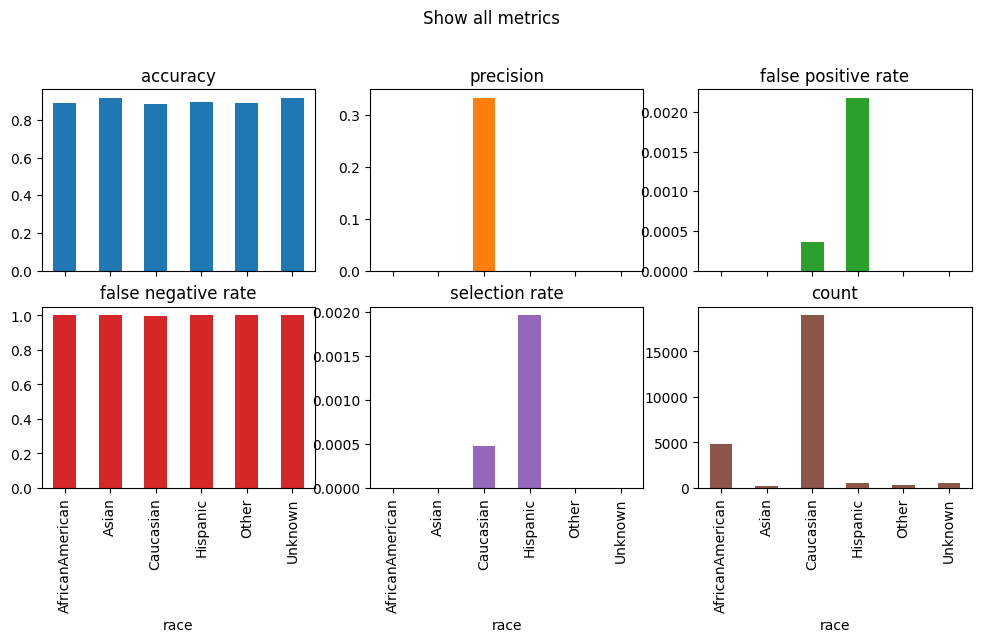

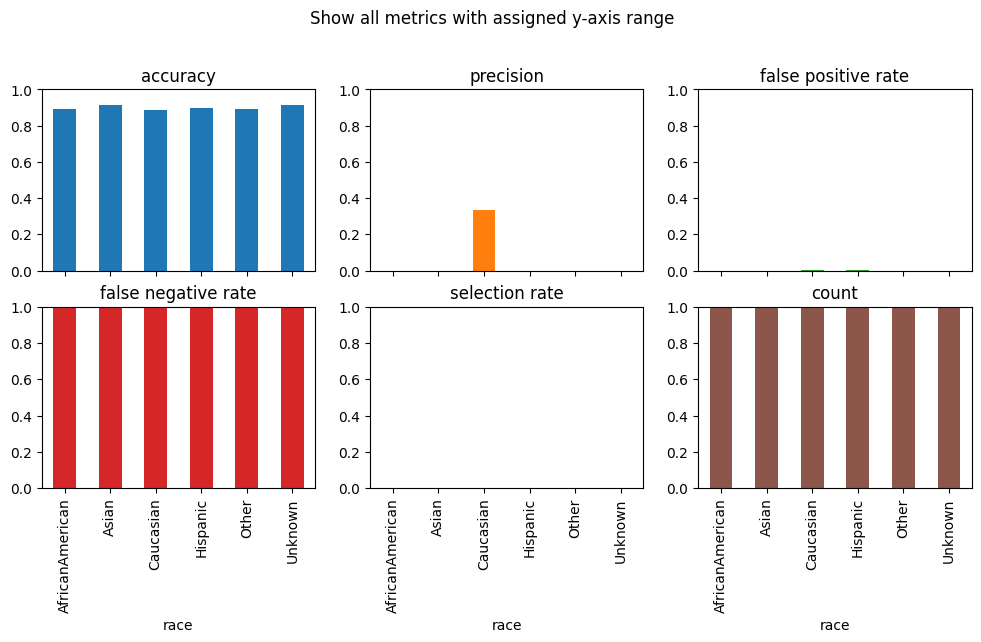

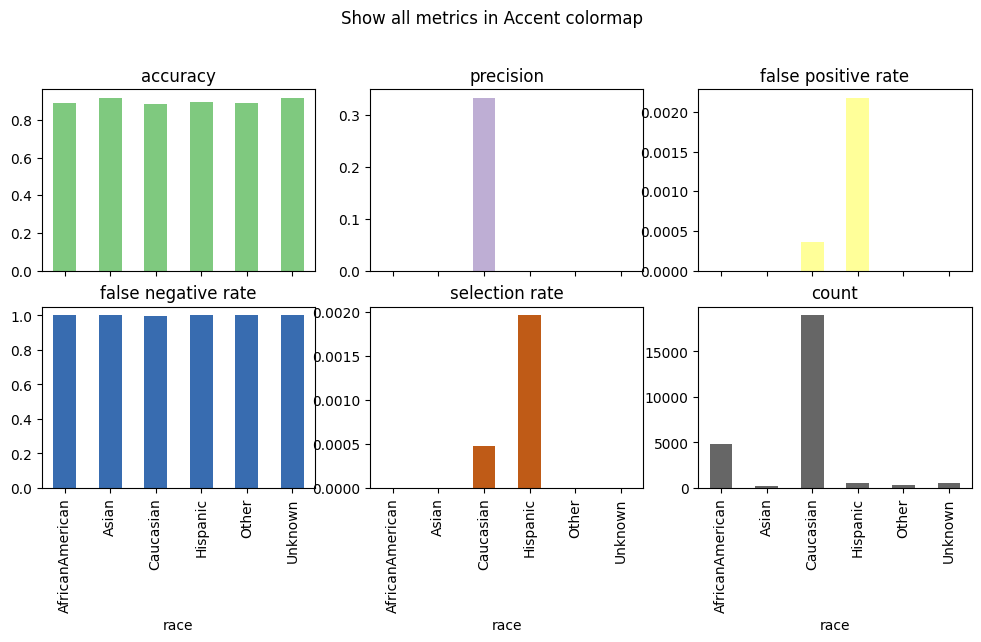

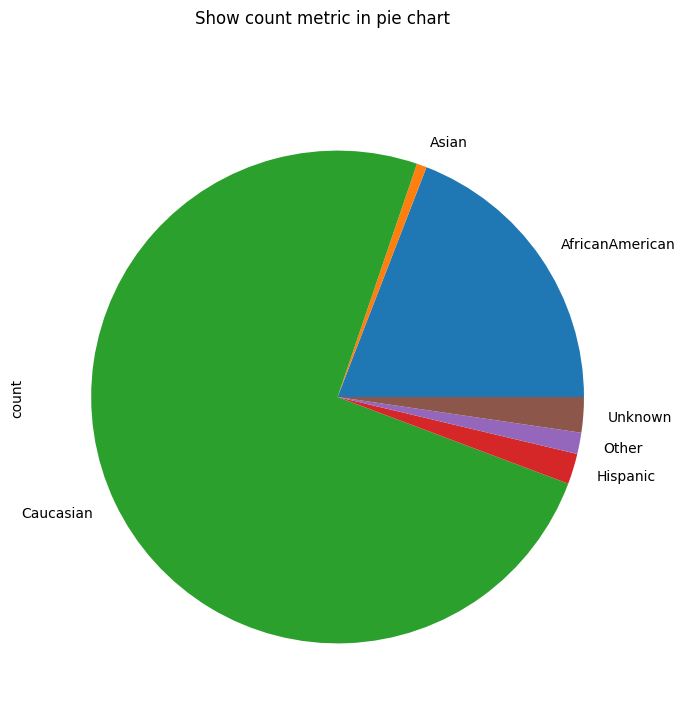

In [5]:
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

# Customize plots with ylim
metric_frame.by_group.plot(
    kind="bar",
    ylim=[0, 1],
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics with assigned y-axis range",
)

# Customize plots with colormap
metric_frame.by_group.plot(
    kind="bar",
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    colormap="Accent",
    title="Show all metrics in Accent colormap",
)

# Customize plots with kind (note that we are only plotting the "count" metric here because we are showing a pie chart)
metric_frame.by_group[["count"]].plot(
    kind="pie",
    subplots=True,
    layout=[1, 1],
    legend=False,
    figsize=[12, 8],
    title="Show count metric in pie chart",
)

In [16]:
from fairlearn.metrics import (
    demographic_parity_difference, demographic_parity_ratio,
    equalized_odds_difference, equalized_odds_ratio,
)

demo_parity_diff = demographic_parity_difference(y_test.to_numpy(), y_pred, sensitive_features=A_test.to_numpy())
demo_parity_ratio = demographic_parity_ratio(y_test.to_numpy(), y_pred, sensitive_features=A_test.to_numpy())
equal_odds_diff = equalized_odds_difference(y_test.to_numpy(), y_pred, sensitive_features=A_test.to_numpy())
equal_odds_ratio = equalized_odds_ratio(y_test.to_numpy(), y_pred, sensitive_features=A_test.to_numpy())

print(f"Demographic Parity Difference: {demo_parity_diff:.4f}")
print(f"Demographic Parity Ratio: {demo_parity_ratio:.4f}")
print(f"Equalized Odds Difference: {equal_odds_diff:.4f}")
print(f"Equalized Odds Ratio: {equal_odds_ratio:.4f}")

Demographic Parity Difference: 0.0020
Demographic Parity Ratio: 0.0000
Equalized Odds Difference: 0.0022
Equalized Odds Ratio: 0.0000
